In [84]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap
import folium

In [85]:
#reads the HappyIndex and WalkScore files and saves them in a list
HappyIndex = pd.read_csv("HappyIndex.csv")
WalkScore = pd.read_csv("WalkScore.csv")

#creates an empty dictionary to hold all the city data
citydata = {}

#goes through the WalkScore list and makes the names of all the cities the keys in the dictionary and makes the values the walk score of that city
for i in range(len(WalkScore)):
    citydata[WalkScore['ScoreCity'][i]] = [WalkScore['WalkScore'][i]]

#first for loop iterates through the length of the HappyIndex list and adds all the city names in the happy list
#second for loop goes through all the keys in the dictionary
for i in range(len(HappyIndex)):
    happy = HappyIndex['HappyCity'][i]
    for city in citydata.keys():
        #if the name of the city in happy is the same as the key then append the Happy Index and Income Ranking to the dictionary preventing duplicates 
        if city in happy:
            citydata[city].append(HappyIndex['Happy Index'][i])
            citydata[city].append(HappyIndex['Income'][i])

#create a new dictionary that only has cities in both the WalkScore and HappyIndex files
updatedcities = {}
for city in citydata:
    if (len(citydata[city]) == 3):
        updatedcities[city] = citydata[city]

#adds the state abbreviations to the updated cities dictionary 
for city in updatedcities:
    for i in HappyIndex['HappyCity']:
        if city in i:
            updatedcities[city].append(i[-2:])

#prints the updatedcities dictionary and its length
print(updatedcities)
print(len(updatedcities))

#creates new lists to hold the happyscores, walkscores, and incomescores so we can use them for graphing
happyscores = []
walkscores = []
incomescores = []
states = []

#iterates through the dictionary's values and adds the values to the corresponding list
for i in updatedcities.values():
    walkscores.append(i[0])
    happyscores.append(i[1])
    incomescores.append(i[2])
    states.append(i[3])

{'New York': [88.0, 57.99, 152, 'NY'], 'Los Angeles': [68.6, 56.02, 81, 'CA'], 'Chicago': [77.2, 56.72, 174, 'IL'], 'Houston': [47.5, 48.83, 145, 'TX'], 'Philadelphia': [74.8, 45.63, 128, 'PA'], 'Phoenix': [41.4, 51.2, 111, 'AZ'], 'San Antonio': [36.9, 46.23, 112, 'TX'], 'San Diego': [53.3, 63.98, 28, 'CA'], 'Dallas': [46.0, 49.23, 99, 'TX'], 'San Jose': [50.5, 70.35, 3, 'CA'], 'Jacksonville': [25.6, 51.2, 103, 'FL'], 'Indianapolis': [31.0, 44.72, 167, 'IN'], 'San Francisco': [88.7, 68.73, 8, 'CA'], 'Austin': [41.7, 58.87, 26, 'TX'], 'Fort Worth': [34.9, 51.01, 119, 'TX'], 'Charlotte': [26.4, 59.29, 70, 'NC'], 'Detroit': [51.1, 30.6, 178, 'MI'], 'El Paso': [40.4, 50.18, 151, 'TX'], 'Memphis': [35.0, 35.48, 182, 'TN'], 'Baltimore': [64.3, 45.18, 172, 'MD'], 'Boston': [82.8, 59.28, 9, 'MA'], 'Seattle': [74.4, 65.59, 4, 'WA'], 'Denver': [61.2, 57.96, 104, 'CO'], 'Milwaukee': [61.5, 51.31, 171, 'WI'], 'Oklahoma City': [34.1, 48.16, 146, 'OK'], 'Albuquerque': [42.6, 49.04, 98, 'NM'], 'Tucso

Coordinate: (49.7, 69.72)
Coordinate: (50.5, 70.35)
Coordinate: (57.1, 34.16)
Coordinate: (51.1, 30.6)
Coordinate: (49.9, 76.1)
[49.7, 50.5, 57.1, 51.1, 49.9]
[69.72, 70.35, 34.16, 30.6, 76.1]
Madison, WI
San Jose, CA
Cleveland, OH
Detroit, MI
Fremont, CA


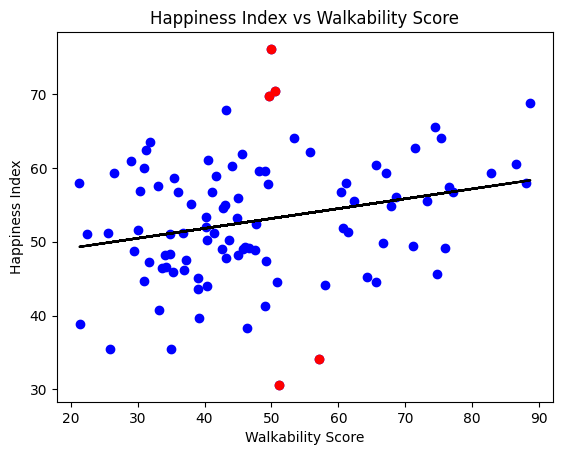

In [86]:
# Scatter plot
plt.scatter(walkscores, happyscores, c="blue")

# Calculate the line of best fit
fit = np.polyfit(walkscores, happyscores, 1)
line = np.poly1d(fit)

# Calculate distances from each point to the line of best fit
distances = np.abs(happyscores - line(walkscores))

# Find the indices of points with maximum distances
max_distance_indices = np.argsort(distances)[-5:]  # Selecting the 5 points with the maximum distances

# Highlight the points with maximum distances
plt.scatter(np.array(walkscores)[max_distance_indices], np.array(happyscores)[max_distance_indices], c="red")

# Plot the line of best fit
plt.plot(walkscores, line(walkscores), color='black')

# Add the equation of the line of best fit as text on the plot
#equation = f'Y = {fit[0]:.3f}X + {fit[1]:.3f}'
#plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes)

# Add the R-squared value as text on the plot
#r_squared = 1 - (np.sum(residuals ** 2) / np.sum((happyscores - np.mean(happyscores)) ** 2))
#plt.text(0.05, 0.85, f'R-squared = {r_squared:.3f}', transform=plt.gca().transAxes)

# Print the coordinates of the points with maximum distances
walkcoordinate = []
happycoordinate = []
for index in max_distance_indices:
    print(f"Coordinate: ({walkscores[index]}, {happyscores[index]})")
    walkcoordinate.append(walkscores[index])
    happycoordinate.append(happyscores[index])
print(walkcoordinate)
print(happycoordinate)

# Plot labels and title
plt.title('Happiness Index vs Walkability Score')
plt.xlabel('Walkability Score')
plt.ylabel('Happiness Index')

#prints the name of the outlier cities
for coordinate in range(len(walkcoordinate)):
    for i in updatedcities:
        if (walkcoordinate[coordinate] == updatedcities[i][0] and happycoordinate[coordinate] == updatedcities[i][1]):
            print(i + ", " + updatedcities[i][3])

# Display the plot
plt.show()

There appears to be an positive correlation between higher walkability and more emotional happiness, albeit there are some outliers as expected. 

Coordinate: (61.5, 171)
Coordinate: (64.3, 172)
Coordinate: (51.1, 178)
Coordinate: (50.5, 3)
Coordinate: (77.2, 174)


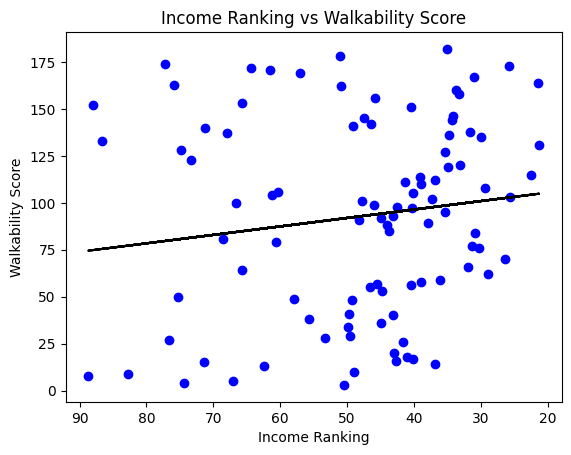

In [87]:
# Scatter plot
plt.scatter(walkscores, incomescores, c="blue")

# Calculate the line of best fit
fit = np.polyfit(walkscores, incomescores, 1)
line = np.poly1d(fit)

# Calculate distances from each point to the line of best fit
distances = np.abs(incomescores - line(walkscores))

# Find the indices of points with maximum distances
max_distance_indices = np.argsort(distances)[-5:]  # Selecting the 5 points with the maximum distances

# Highlight the points with maximum distances
#plt.scatter(np.array(walkscores)[max_distance_indices], np.array(incomescores)[max_distance_indices], c="red")

# Plot the line of best fit
plt.plot(walkscores, line(walkscores), color='black')

# Add the equation of the line of best fit as text on the plot
#equation = f'Y = {fit[0]:.3f}X + {fit[1]:.3f}'
#plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes)

# Add the R-squared value as text on the plot
#plt.text(0.05, 0.85, f'R-squared = {r_squared:.3f}', transform=plt.gca().transAxes)

# Print the coordinates of the points with maximum distances
for index in max_distance_indices:
    print(f"Coordinate: ({walkscores[index]}, {incomescores[index]})")

# Plot labels and title
plt.title('Income Ranking vs Walkability Score')
plt.xlabel('Income Ranking')
plt.ylabel('Walkability Score')
plt.gca().invert_xaxis()

# Display the plot
plt.show()


The graph illustrates that higher incomes correlate with more walkability, and lower incomes tend to have less walkability. In order to create this visualization, it was necessary to invert the x-axis because lower incomes have a higher ranking, and vice versa. For example, a region ranked #1 would have the highest income, whereas a region ranked 90 would have the lowest income.

Coordinate: (174, 56.72)
Coordinate: (58, 43.61)
Coordinate: (178, 30.6)
Coordinate: (49, 44.08)
Coordinate: (34, 76.1)


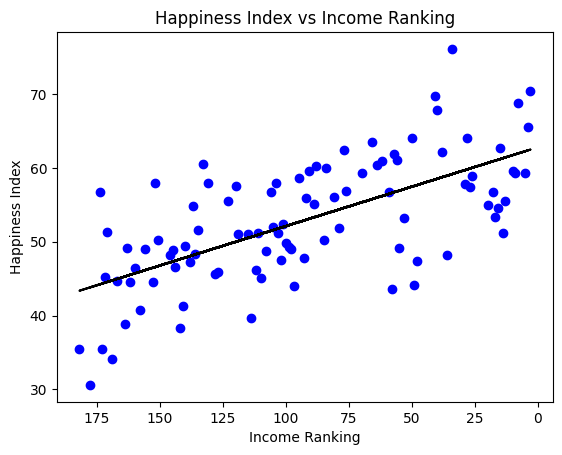

In [88]:
# Scatter plot
plt.scatter(incomescores, happyscores, c="blue")

# Calculate the line of best fit
fit = np.polyfit(incomescores, happyscores, 1)
line = np.poly1d(fit)

# Calculate distances from each point to the line of best fit
distances = np.abs(happyscores - line(incomescores))

# Find the indices of points with maximum distances
max_distance_indices = np.argsort(distances)[-5:]  # Selecting the 5 points with the maximum distances

# Highlight the points with maximum distances
#plt.scatter(np.array(incomescores)[max_distance_indices], np.array(happyscores)[max_distance_indices], c="red")

# Plot the line of best fit
plt.plot(incomescores, line(incomescores), color='black')

# Add the equation of the line of best fit as text on the plot
#equation = f'Y = {fit[0]:.3f}X + {fit[1]:.3f}'
#plt.text(0.05, 0.9, equation, transform=plt.gca().transAxes)

# Add the R-squared value as text on the plot
#residuals = happyscores - line(incomescores)
#ss_residuals = np.sum(residuals ** 2)
#ss_total = np.sum((happyscores - np.mean(happyscores)) ** 2)
#r_squared = 1 - (ss_residuals / ss_total)
#plt.text(0.05, 0.85, f'R-squared = {r_squared:.3f}', transform=plt.gca().transAxes)

# Print the coordinates of the points with maximum distances
for index in max_distance_indices:
    print(f"Coordinate: ({incomescores[index]}, {happyscores[index]})")

# Plot labels and title
plt.title('Happiness Index vs Income Ranking')
plt.xlabel('Income Ranking')
plt.ylabel('Happiness Index')
plt.gca().invert_xaxis()

# Display the plot
plt.show()


The graph shows a strong correlation between income ranking and happiness, where higher income regions tend to have more happiness. It was necessary to invert the income x-axis as lower incomes are represented by higher rankings (ranking #1 having the most income and ranking #175 having the least).

['Jacksonville', 'Miami', 'Tampa', 'St. Petersburg', 'Orlando', 'Hialeah']
[25.6, 76.6, 49.5, 43.0, 41.1, 67.9]
[51.2, 57.45, 57.85, 54.93, 56.66, 54.84]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


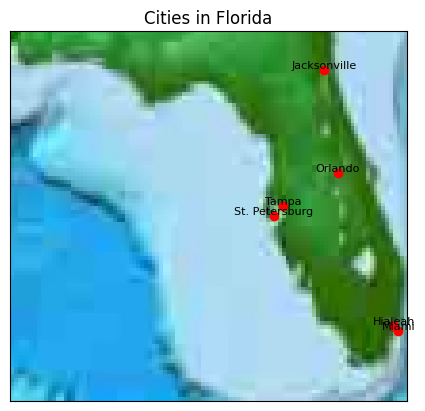

In [89]:
FLWalk = []
FLHappy = []
FLCities = []

for i in updatedcities:
    if updatedcities[i][-1] == 'FL':
        FLCities.append(i)
        FLWalk.append(updatedcities[i][0])
        FLHappy.append(updatedcities[i][1])
print(FLCities)
print(FLWalk)
print(FLHappy)

# Create a basemap instance centered around Florida
florida_map = Basemap(llcrnrlon=-87.634936, llcrnrlat=24.396308,
                      urcrnrlon=-79.974304, urcrnrlat=31.000968, resolution='l', projection='lcc',
                      lat_1=24, lat_2=31, lon_0=-81)

# Load a background image of the map
florida_map.etopo()

# Plot the cities on the map
for city in FLCities:
    geocode_result = geolocator.geocode(city + ', Florida')
    if geocode_result is not None:
        city_lat = geocode_result.latitude
        city_lng = geocode_result.longitude
        x, y = florida_map(city_lng, city_lat)
        plt.plot(x, y, 'ro', markersize=6)
        plt.text(x, y, city, fontsize=8, ha='center', va='bottom')

# Display the map
plt.title('Cities in Florida')
plt.show()


In [90]:
# Creates a list of all the cities
cities = list(updatedcities.keys())

# Create a geolocator object
geolocator = Nominatim(user_agent="usa_map")

# Create a map centered around the USA
usa_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Plot the cities on the map
for city, walk, happy in zip(cities, walkscores, happyscores):
    location = geolocator.geocode(city + ', USA')
    if location is not None:
        city_lat = location.latitude
        city_lng = location.longitude
        marker_popup = f"{city}<br>Walkability Score: {walk}<br>Happiness Index: {happy}"
        folium.Marker(
            location=[city_lat, city_lng],
            popup=marker_popup,
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(usa_map)

# Display the map
usa_map